In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

from cosmojo.universe import Cosmo
from cosmojo.mass_func import MassFunction

from hmf import MassFunction as HMF
from hmf import cosmo as Kosmo

from astropy.cosmology import FlatLambdaCDM

%load_ext line_profiler

In [6]:
cosmo = Cosmo()

In [102]:
z = 0.

# CosMojo HMF
mf  = MassFunction(cosmo, z=z)

# hmf HMF
hmf = HMF(hmf_model='Tinker10')
hmf.update(cosmo_model=FlatLambdaCDM(H0=cosmo.H0, Om0=cosmo.omegam, Tcmb0=2.725, Ob0=cosmo.omegab))
hmf.update(z=z, sigma_8=cosmo.sigma_Rz(8./cosmo.h), n=cosmo.ns)

Text(0,0.5,u'$dn/dM \\, [Mpc^{-3}M_{\\odot}^{-1}]$')

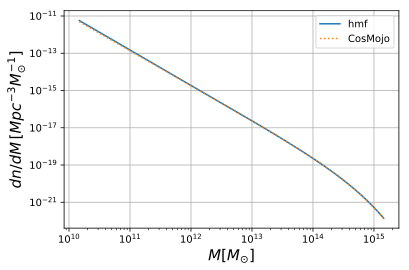

In [125]:
plt.loglog(hmf.m/cosmo.h, hmf.dndm*cosmo.h**4, label='hmf') 
plt.loglog(hmf.m/cosmo.h, mf.dndm(hmf.m/cosmo.h, z), ':', label='CosMojo')
plt.legend()
plt.grid()
plt.xlabel(r'$M [M_{\odot}]$', size=15)
plt.ylabel(r'$dn/dM \, [Mpc^{-3}M_{\odot}^{-1}]$', size=15)

Text(0,0.5,u'$\\frac{(dn/dM)_{\\rm CosMojo}}{(dn/dM)_{\\rm hmf}}-1 \\, [\\%]$')

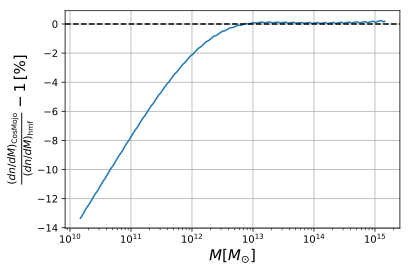

In [123]:
plt.semilogx(hmf.m/cosmo.h, 100 * (mf.dndm(hmf.m/cosmo.h, z)/(hmf.dndm*cosmo.h**4)-1) ) 
plt.axhline(ls='--', c='k')
plt.grid()
plt.xlabel(r'$M [M_{\odot}]$', size=15)
plt.ylabel(r'$\frac{(dn/dM)_{\rm CosMojo}}{(dn/dM)_{\rm hmf}}-1 \, [\%]$', size=15)


Text(0,0.5,u'$\\frac{f(\\sigma)_{\\rm CosMojo}}{f(\\sigma)_{\\rm hmf}}-1 \\, [\\%]$')

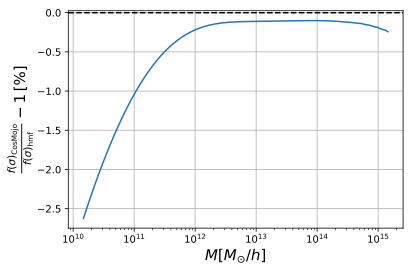

In [124]:
plt.semilogx(hmf.m/cosmo.h, 100*(hmf.fsigma/mf.f_sigma(hmf.m/cosmo.h,0)-1))
plt.axhline(ls='--', c='k')
plt.grid()
plt.xlabel(r'$M [M_{\odot}/h]$', size=15)
plt.ylabel(r'$\frac{f(\sigma)_{\rm CosMojo}}{f(\sigma)_{\rm hmf}}-1 \, [\%]$', size=15)


In [112]:
hmf_online = np.loadtxt('/Users/fbianchini/Downloads/all_plots/mVector_myparams.txt')

## To compare with Fig.2 of Tinker+10

Text(0,0.5,u'$\\log(b)$')

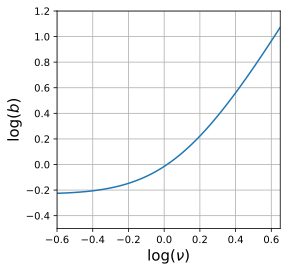

In [166]:
lognus = np.linspace(-0.6,0.7)
plt.figure(figsize=(4,4))
plt.plot(lognus, np.log10(mf.bias_nu(10**lognus)))
plt.grid()
plt.xlim(-0.6,0.65)
plt.ylim(-0.5,1.2)
plt.xlabel(r'$\log(\nu)$', size=15)
plt.ylabel(r'$\log(b)$', size=15)